![Example image](https://upload.wikimedia.org/wikipedia/commons/0/02/Northeastern_Wordmark.svg)

# Text Processing Analysis

Copyright: GenAI Research Group, NU, Seattle

Website:https://genairesearch.sites.northeastern.edu

### This Notebook shows step by step example of text processing. NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books

In [2]:
#importing NLTK libraries 
import nltk
#from nltk.corpus import brown
from nltk.corpus import gutenberg
from pprint import pprint
import itertools # looping through set items

In [3]:
# You can see the list the books avaiable in gutenberg field
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/s.sushmita/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

## Shakespeare Hamlet

### In the next steps shakespeare-hamlet example will be used. For practice try to replace with any other book in the gutenberg collection.

In [4]:
hamlet = gutenberg.raw(fileids='shakespeare-hamlet.txt')

In [5]:
# Total characters in Shakespear Hamlet
print(len(hamlet))

162881


In [6]:
# Loading punkt librray 
# The NLTK data package includes a pre-trained Punkt tokenizer for English.

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/s.sushmita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenization and Removing Special Characters

In [7]:
tokens = nltk.word_tokenize(hamlet)

In [8]:
# checking the type of the tokens

type(tokens)

list

In [9]:
len(tokens) # length or number of tokens 

36372

In [10]:
tokens[:15] # print first 15 tokens

['[',
 'The',
 'Tragedie',
 'of',
 'Hamlet',
 'by',
 'William',
 'Shakespeare',
 '1599',
 ']',
 'Actus',
 'Primus',
 '.',
 'Scoena',
 'Prima']

## Text Normalization Steps 

In [11]:
import re
# making everything lower case
norrmalized_tokens = [re.sub(r'\W+', '', token.lower()) for token in tokens]
print(len(norrmalized_tokens)) 

36372


In [12]:
# Remove single-character tokens (mostly punctuation)
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if len(norrmalized_tokens) > 1]

In [13]:
# Remove numbers
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if not norrmalized_tokens.isnumeric()]

In [14]:
# lets see number of tokens left after the first two pre-processing steps
print(len(norrmalized_tokens))

28518


# Stopword Removal

In [15]:
# NLTK also has list of stopwords that we can use

from nltk.corpus import stopwords # library 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s.sushmita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
all_stopwords = set(stopwords.words('english')) # set the language 

In [17]:
for i, val in enumerate(itertools.islice(all_stopwords, 10)):
    print(val) # print first 10 stopwords

shouldn't
it's
had
this
mustn
be
just
on
don
she


In [18]:
# Remove stopwords
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if norrmalized_tokens not in all_stopwords]
# lets see number of tokens left after stop word removal step
print(len(norrmalized_tokens))

15718


# Frequency Distribution

In [19]:
#Frequency Distribution 
fdist = nltk.FreqDist(norrmalized_tokens)

In [20]:
# Output top 20 words
print(fdist.most_common(20)) 

[('ham', 337), ('lord', 211), ('haue', 175), ('king', 172), ('shall', 107), ('thou', 105), ('come', 104), ('let', 104), ('hamlet', 100), ('good', 98), ('hor', 95), ('thy', 90), ('enter', 85), ('oh', 81), ('like', 77), ('well', 70), ('know', 69), ('would', 68), ('selfe', 67), ('may', 65)]


# Word Cloud 

In [22]:
#conda install -c conda-forge wordcloud

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /Users/s.sushmita/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.9.3            |  py311h80987f9_0         190 KB
    ------------------------------------------------------------
                                           Total:         190 KB

The following NEW packages will be INSTALLED:

  wordcloud          pkgs/main/osx-arm64::wordcloud-1.9.3-py311h80987f9_0 



                                                                  

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

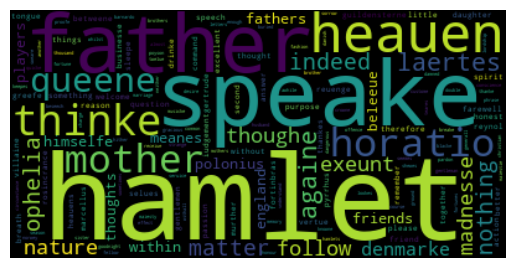

In [23]:
frequent_words = dict([(m, n) for m, n in fdist.items() if len(m) > 5])
 
wcloud = WordCloud().generate_from_frequencies(frequent_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# All Books from Shakespeare

In [24]:
# Get the list of Shakespeare's work file ids
shakespeare_file_ids = [fileid for fileid in gutenberg.fileids() if 'shakespeare' in fileid]


In [25]:
# Read each work and concatenate into a single string
shakespeare_texts = ""
for fileid in shakespeare_file_ids:
    shakespeare_texts += gutenberg.raw(fileids=fileid)


In [26]:
# Total characters in Shakespear 
print(len(shakespeare_texts))

375542


In [27]:
tokens = nltk.word_tokenize(shakespeare_texts)

In [28]:
tokens[:10] # print first 15 tokens

['[',
 'The',
 'Tragedie',
 'of',
 'Julius',
 'Caesar',
 'by',
 'William',
 'Shakespeare',
 '1599']

In [29]:
# making everything lower case
norrmalized_tokens = [re.sub(r'\W+', '', token.lower()) for token in tokens]
print(len(norrmalized_tokens))

83856


In [30]:
# Remove single-character tokens (mostly punctuation)
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if len(norrmalized_tokens) > 1]

# Remove numbers
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if not norrmalized_tokens.isnumeric()]

# lets see number of tokens left after the first two pre-processing steps
print(len(norrmalized_tokens))

65138


In [31]:
# Remove stopwords
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if norrmalized_tokens not in all_stopwords]
# lets see number of tokens left after stop word removal step
print(len(norrmalized_tokens))

36557


In [32]:
#Frequency Distribution 
fdist = nltk.FreqDist(norrmalized_tokens)

# Output top 20 words
print(fdist.most_common(20)) 

[('haue', 444), ('ham', 337), ('thou', 307), ('shall', 300), ('lord', 293), ('come', 232), ('enter', 230), ('king', 229), ('let', 217), ('good', 216), ('thy', 202), ('caesar', 193), ('vs', 184), ('thee', 174), ('know', 170), ('brutus', 162), ('would', 159), ('vpon', 157), ('like', 156), ('bru', 153)]


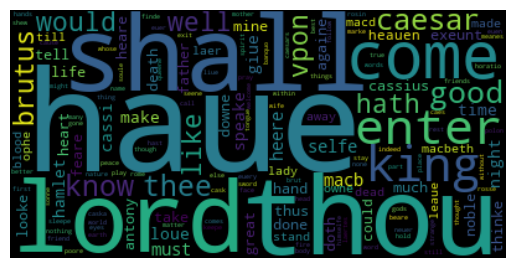

In [33]:
frequent_words = dict([(m, n) for m, n in fdist.items() if len(m) > 3])
 
wcloud = WordCloud().generate_from_frequencies(frequent_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()